In [ ]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 84.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python /content/drive/MyDrive/ML_LAB_Final_Task1/Preprocessing_Scripts/Preprocess.py


Extracting EDF parameters from /content/drive/MyDrive/edfs/p15_Record1.edf...
EDF file detected
Setting channel info structure...
/content/drive/MyDrive/ML_LAB_Final_Task1/Preprocessing_Scripts/Preprocess.py:39: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  data = mne.io.read_raw_edf(file_path, preload=True)
/content/drive/MyDrive/ML_LAB_Final_Task1/Preprocessing_Scripts/Preprocess.py:39: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  data = mne.io.read_raw_edf(file_path, preload=True)
Creating raw.info structure...
Reading 0 ... 5401499  =      0.000 ... 10802.998 secs...
Patient 15, Record1.edf - Raw data shape: (19, 5401500)
Processing seizure 1: start 3579000, end 3604000, duration 50s
Extracting EDF parameters from /content/drive/MyDrive/edfs/p15_Record2.edf...
EDF file detected
Setting channel info structure...
/content/drive/MyDrive/ML_LAB_Final_Task1/Preprocessing_Script

In [ ]:
!pip install xgboost scikit-learn

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

# Load the data
x_train = np.load('/content/drive/MyDrive/data_aligned/x_train.npy')
y_train = np.load('/content/drive/MyDrive/data_aligned/y_train.npy')
x_test = np.load('/content/drive/MyDrive/data_aligned/x_test.npy')
y_test = np.load('/content/drive/MyDrive/data_aligned/y_test.npy')

# Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(x_train.reshape(x_train.shape[0], -1), y_train)
rf_predictions = rf_model.predict(x_test.reshape(x_test.shape[0], -1))
rf_acc = accuracy_score(y_test, rf_predictions)
print(f"Random Forest accuracy: {rf_acc * 100:.2f}%")

# Model 2: XGBoost
xg_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xg_model.fit(x_train.reshape(x_train.shape[0], -1), y_train)
xg_predictions = xg_model.predict(x_test.reshape(x_test.shape[0], -1))
xg_acc = accuracy_score(y_test, xg_predictions)
print(f"XGBoost accuracy: {xg_acc * 100:.2f}%")

# Model 3: CNN (Simple ConvNet)
cnn_model = keras.Sequential([
    layers.InputLayer(input_shape=(x_train.shape[1], x_train.shape[2])),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Assuming binary classification
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)
cnn_predictions = cnn_model.predict(x_test)
cnn_acc = accuracy_score(y_test, (cnn_predictions > 0.5).astype(int))
print(f"CNN accuracy: {cnn_acc * 100:.2f}%")


Random Forest accuracy: 74.19%


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:08:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost accuracy: 51.61%
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1624 - loss: -0.1604
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1767 - loss: -6.4746
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1676 - loss: -34.9550
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1612 - loss: -141.5100
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1704 - loss: -389.0738
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1629 - loss: -940.3770
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1808 - loss: -2155.8069
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1513 - loss: -4816.6514
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1865 - loss: -8206.2676
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1756 - loss: -14145.6279
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
CNN accuracy: 19.35%


Random Forest accuracy: 0.9032258064516129
XGBoost accuracy: 0.9032258064516129
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3740 - loss: 1.3259
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6079 - loss: 1.1900 
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6463 - loss: 1.1076 
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6115 - loss: 0.9968 
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7969 - loss: 0.8265 
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8249 - loss: 0.6666 
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8049 - loss: 0.5328 
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8789 - loss: 0.4131 
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8840 - loss: 0.3323 
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9174 - loss: 0.2983 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.8065 - loss: 0.3814
CNN accuracy: [0.3814103603363037, 0.8064516186714172]


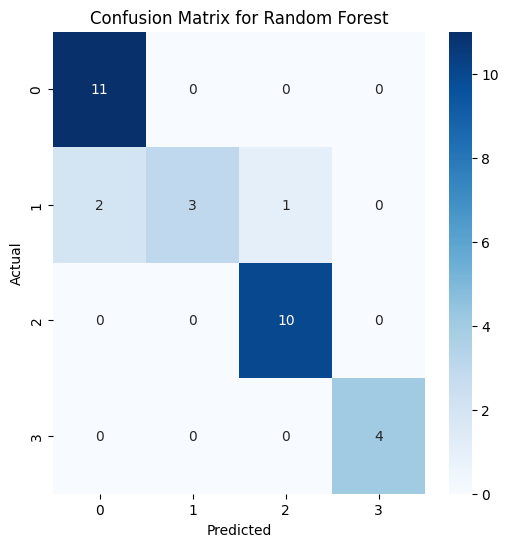

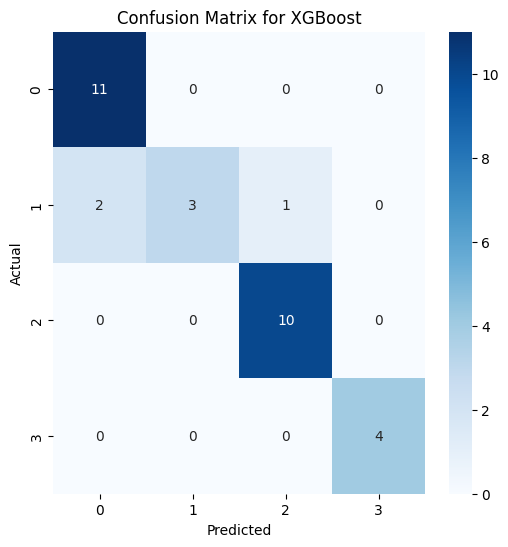

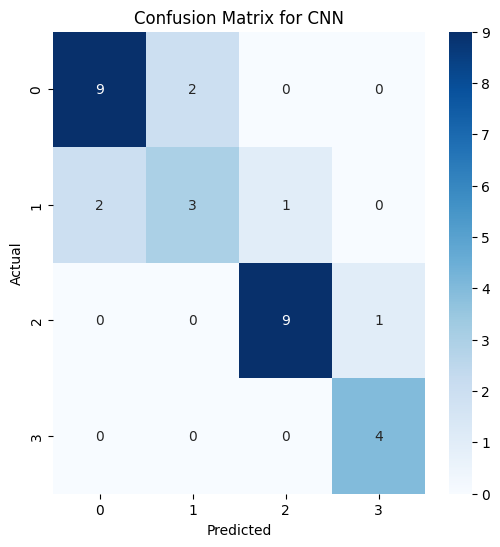

Random Forest classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.50      0.67         6
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00         4

    accuracy                           0.90        31
   macro avg       0.94      0.88      0.88        31
weighted avg       0.92      0.90      0.89        31

XGBoost classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.50      0.67         6
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00         4

    accuracy                           0.90        31
   macro avg       0.94      0.88      0.88        31
weighted avg       0.92      0.90      0.89        31

CNN classification report:
               precision    recal

In [ ]:
import os
import numpy as np
import mne
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering
def feature_extraction(X):
    # Extract features like mean, standard deviation, etc.
    features = []
    for i in range(X.shape[0]):
        mean = np.mean(X[i], axis=1)
        std = np.std(X[i], axis=1)
        max_val = np.max(X[i], axis=1)
        min_val = np.min(X[i], axis=1)
        features.append(np.concatenate([mean, std, max_val, min_val]))
    return np.array(features)

# Load train and test data
x_train = np.load('/content/drive/MyDrive/data_aligned/x_train.npy')
y_train = np.load('/content/drive/MyDrive/data_aligned/y_train.npy')
x_test = np.load('/content/drive/MyDrive/data_aligned/x_test.npy')
y_test = np.load('/content/drive/MyDrive/data_aligned/y_test.npy')

# Feature engineering on data
x_train = feature_extraction(x_train)
x_test = feature_extraction(x_test)

# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print("Random Forest accuracy:", rf.score(x_test, y_test))

# XGBoost Model
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
print("XGBoost accuracy:", xgb.score(x_test, y_test))

# CNN Model
cnn_model = Sequential()
cnn_model.add(Flatten(input_shape=(x_train.shape[1],)))
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(4, activation='softmax'))
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)
cnn_pred = cnn_model.predict(x_test)
cnn_pred = np.argmax(cnn_pred, axis=1)
print("CNN accuracy:", cnn_model.evaluate(x_test, y_test))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for CNN
cm_cnn = confusion_matrix(y_test, cnn_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification reports
print("Random Forest classification report:\n", classification_report(y_test, rf_pred))
print("XGBoost classification report:\n", classification_report(y_test, xgb_pred))
print("CNN classification report:\n", classification_report(y_test, cnn_pred))


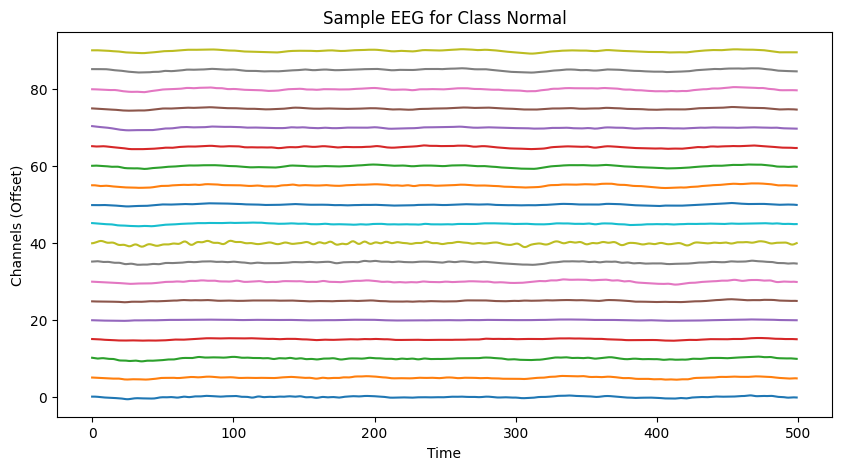

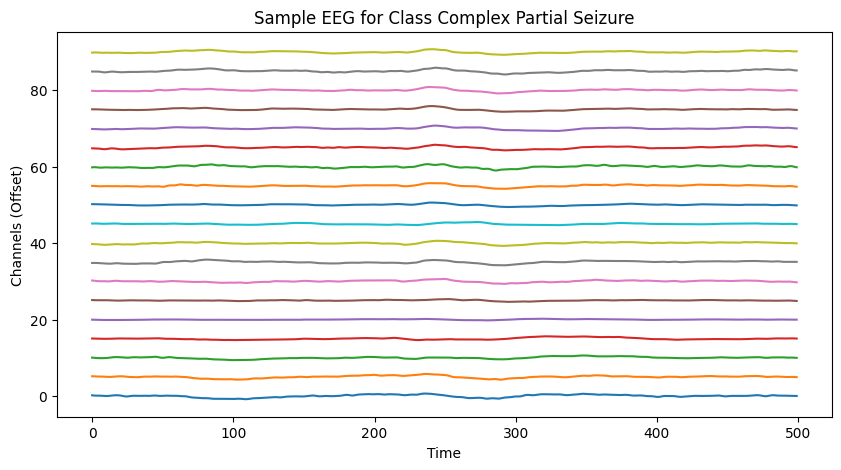

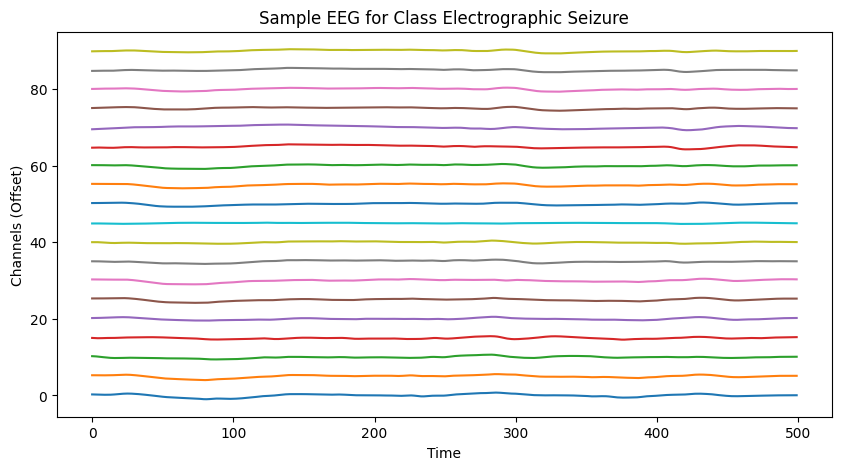

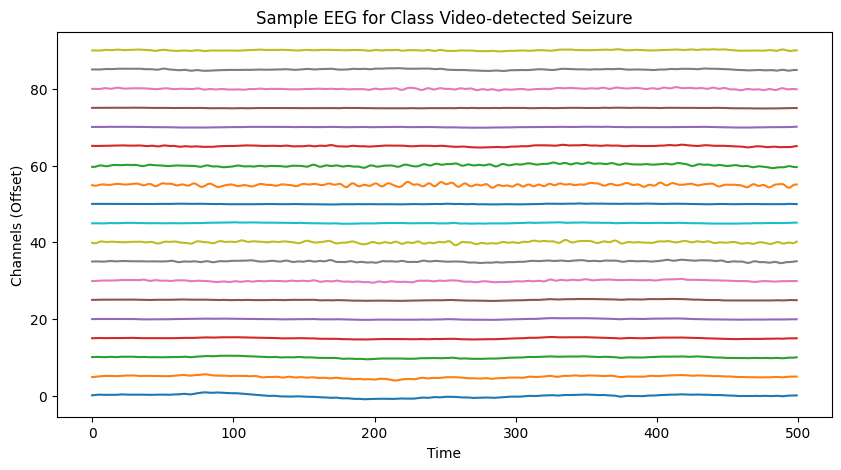

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random

x_train = np.load('/content/drive/MyDrive/data_aligned/x_train.npy')
y_train = np.load('/content/drive/MyDrive/data_aligned/y_train.npy')

# Reshape if needed
sample_size = 20 * 500
x_train = x_train.reshape((-1, 19, 500))
y_train = y_train.reshape(-1)


# Plot one random sample from each class
def plot_sample(class_id):
    idx = random.choice(np.where(y_train == class_id)[0])
    sample = x_train[idx]
    plt.figure(figsize=(10,5))
    for ch in range(19):
        plt.plot(sample[ch] + ch*5)  # vertical offset
    plt.title(f"Sample EEG for Class {label_names[class_id]}")
    plt.xlabel("Time")
    plt.ylabel("Channels (Offset)")
    plt.show()

for i in range(4):
    plot_sample(i)